In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
import scipy.special as sc
from scipy.integrate import odeint
import utility as psu
import scipy.integrate as integ
from scipy.optimize import curve_fit
from scipy import stats
import time
from matplotlib.colors import LogNorm
from numpy.random import randn
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
import os
import process_abalone_utility as pau

/data/abalone/ABALONE_RampingUp/2021_08_25_T0907_ABALONE_7kV_SiPM2_32V_LED300V.dat Number of events 595462.0
Total events number: 595462
event n. 0 time to process: 0.02
event n. 100000 time to process: 10.75
event n. 200000 time to process: 21.56
event n. 300000 time to process: 32.32
event n. 400000 time to process: 43.40
event n. 500000 time to process: 54.31


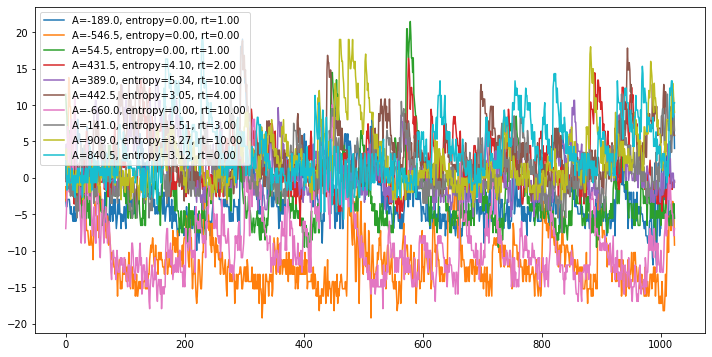

In [2]:
file_LED = '/data/abalone/ABALONE_RampingUp/2021_08_25_T0907_ABALONE_7kV_SiPM2_32V_LED300V.dat'
avolt = 7
dataLED = pau.process_abalone_data(filename=file_LED,nn=0,nplot=10,volts=avolt,sipmv=32,ledv='3')

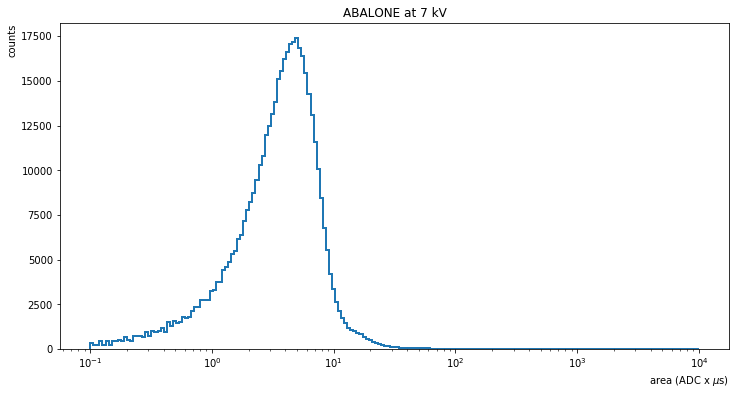

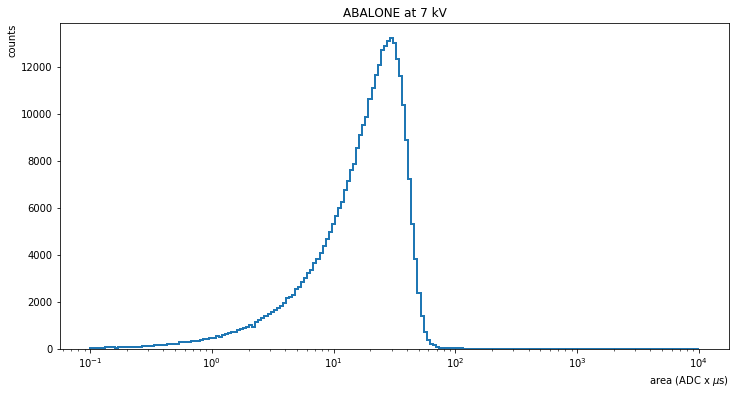

<Figure size 864x432 with 0 Axes>

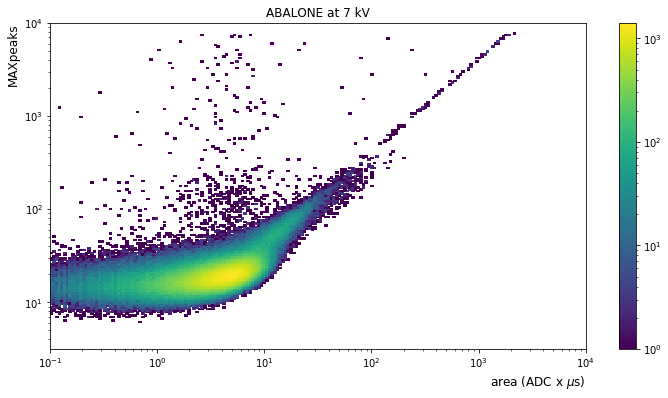

<Figure size 864x432 with 0 Axes>

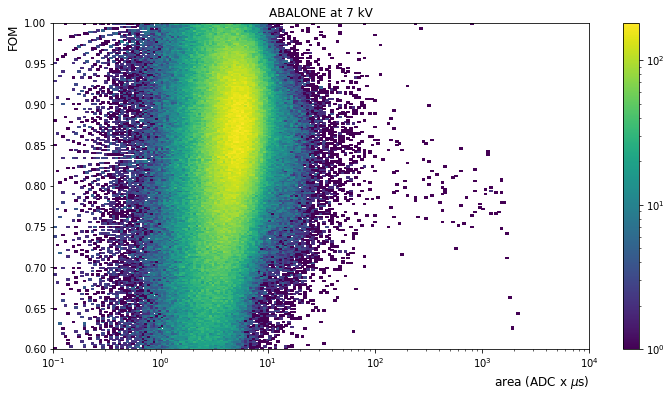

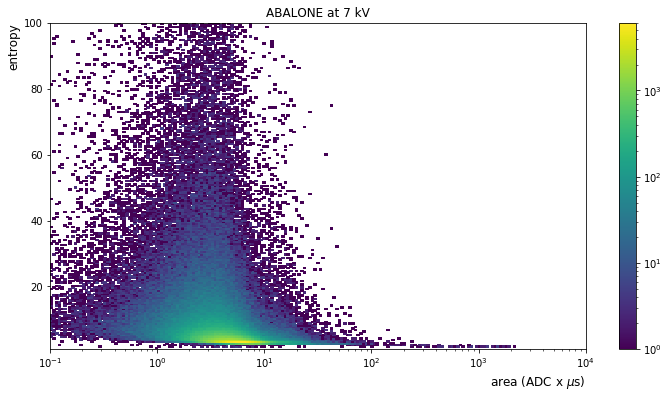

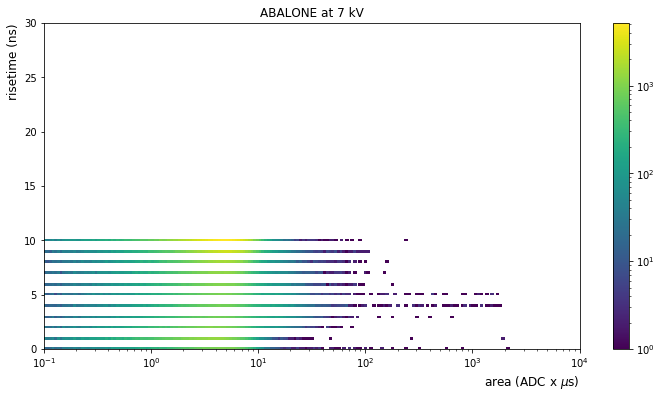

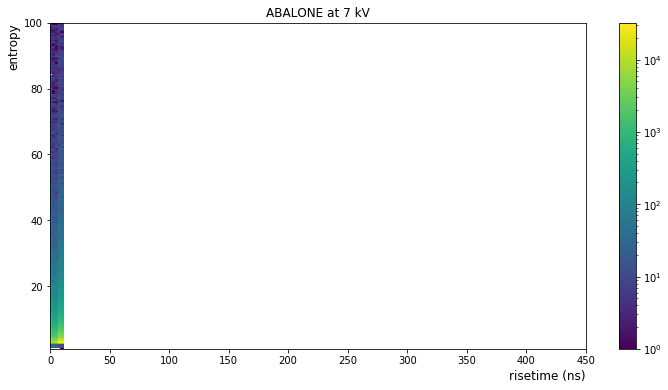

In [3]:
pau.plot_data(data=dataLED,fvolt=avolt,low=-1, high=4,low_max=0.5,high_max=4,low_en=1, high_en=100,
              low_fom=0.6,high_fom=1,high_rt=30)

/data/abalone/ABALONE_RampingUp/2021_08_25_T0907_ABALONE_7kV_SiPM2_32V_LED300V.dat Number of events 595462.0
n. events 0 waveform samples 1024
Events rejected by areaup 0 -> 0.0 %

n. events 108451 waveform samples 1024
Events rejected by areadown 108451 -> 18.21291702913032 %

n. events 0 waveform samples 1024
Events rejected by entropy 0 -> 0.0 %

n. events 0 waveform samples 1024
Events rejected by max 0 -> 0.0 %

n. events 119 waveform samples 1024
Events rejected by risetime 119 -> 0.019984482637011265 %

n. events 541585 waveform samples 1024
Events rejected by max position 541585 -> 90.95206747030036 %

n. events 34452 waveform samples 1024


/usr/share/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->floating,key->block2_values] [items->['area_filt', 'width']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


Events selected  34452 -> 5.785759628658084 %


<Figure size 864x432 with 0 Axes>

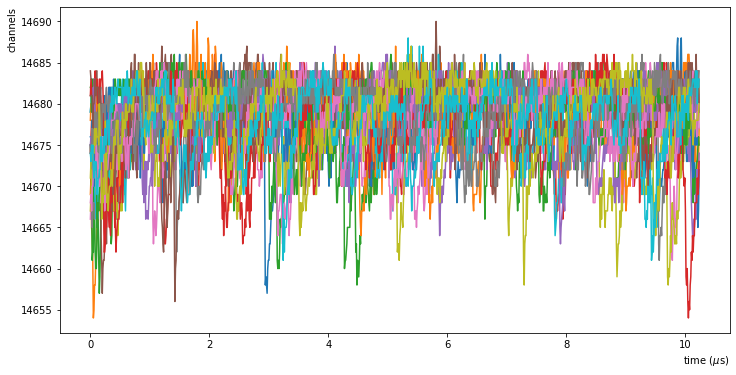

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

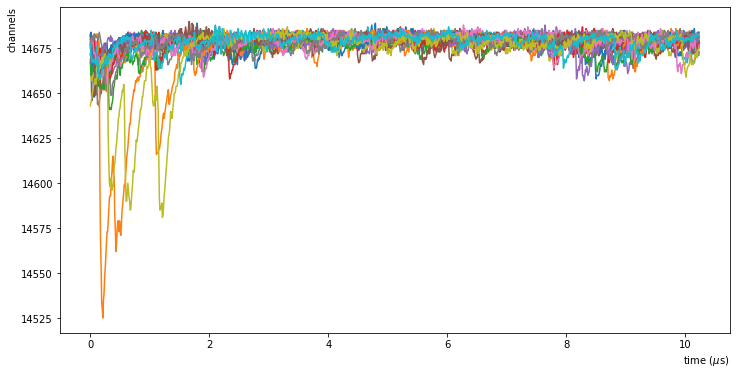

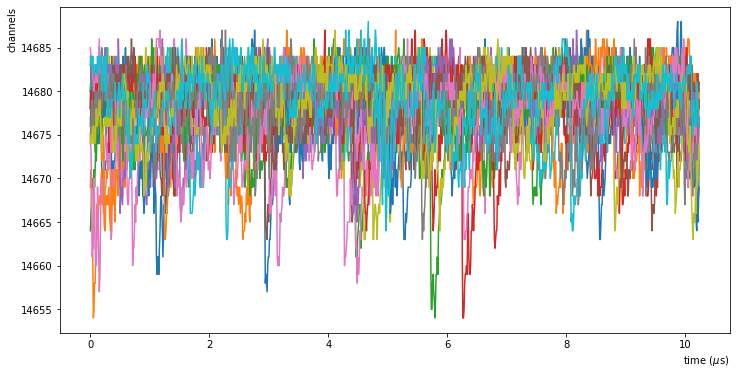

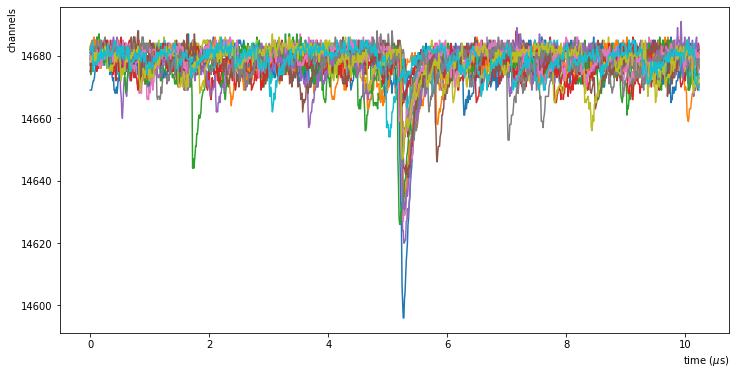

In [4]:
new_data, new_wf = pau.select_data(dataLED,filename=file_LED,entr_cut=200,max_cut=1,area_cut=(0,1e7),
                                   pos_cut=(500,550),rt_cut=0,events=20, save=1,volts=avolt,sipmv=32,ledv='3')

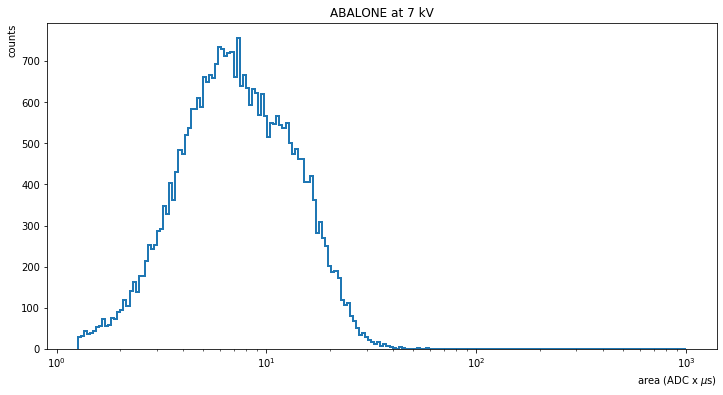

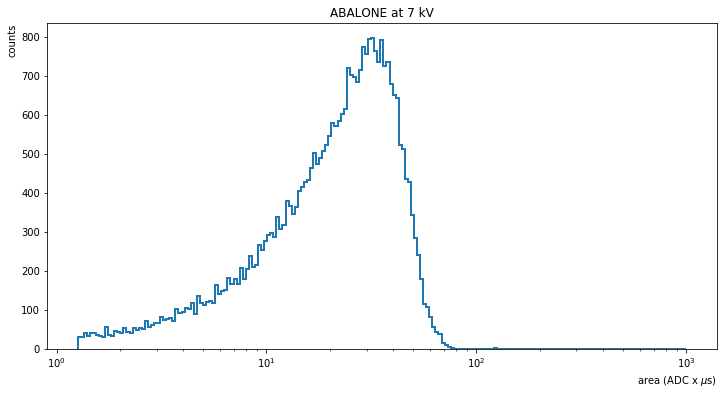

<Figure size 864x432 with 0 Axes>

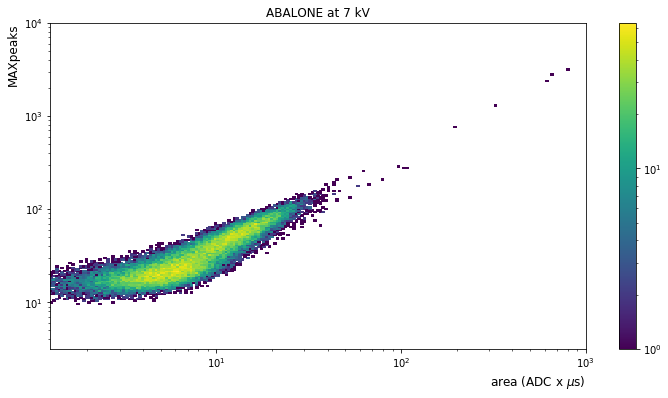

<Figure size 864x432 with 0 Axes>

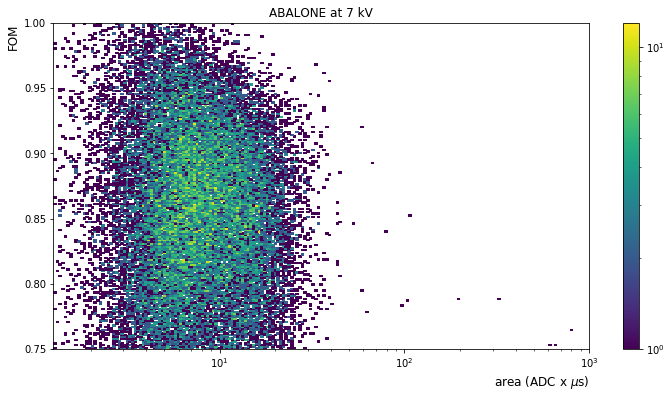

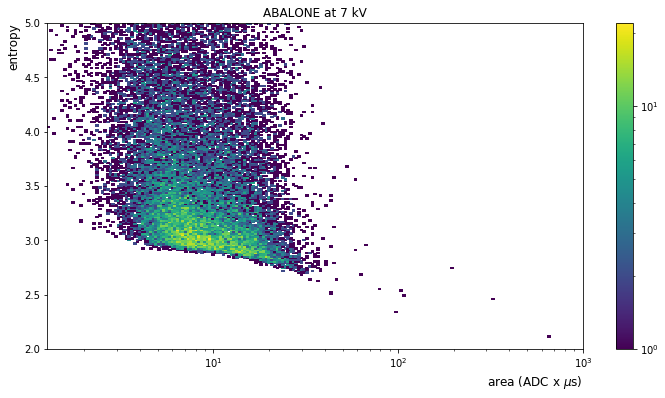

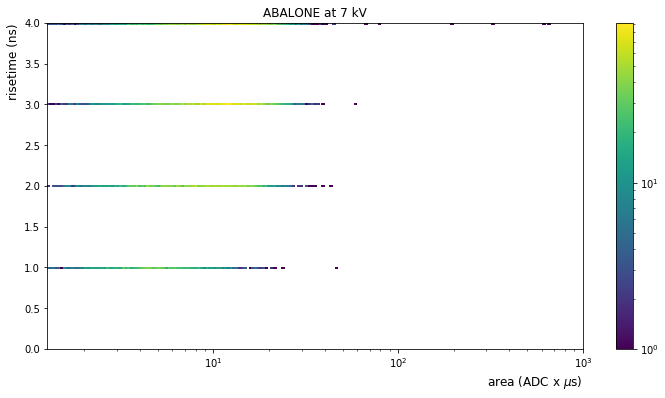

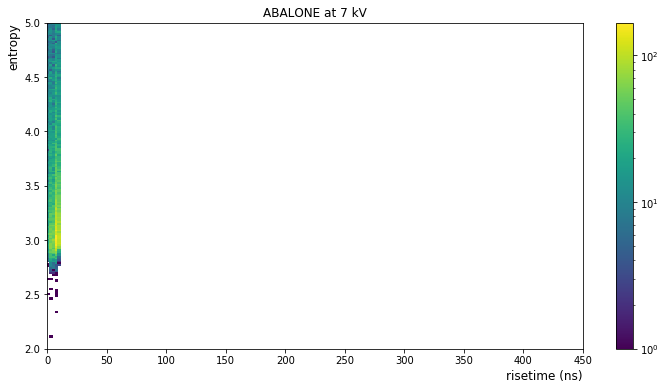

In [5]:
pau.plot_data(data=new_data,fvolt=avolt,low=0.1, high=3,low_max=0.5,high_max=4,low_en=2, high_en=5,
          low_fom=0.75,high_fom=1)

n. events 9111 waveform samples 1024


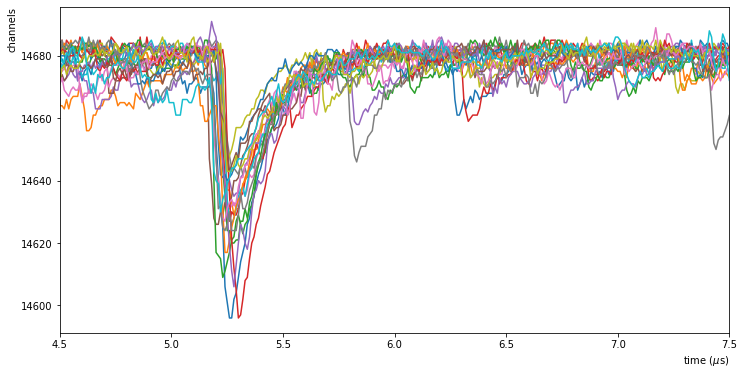

In [6]:
wf2 = new_wf[(new_data['area']>10)&(new_data['area']<20)]
psu.plot_waveforms( wf2,events=20,tlim=(4.5,7.5))

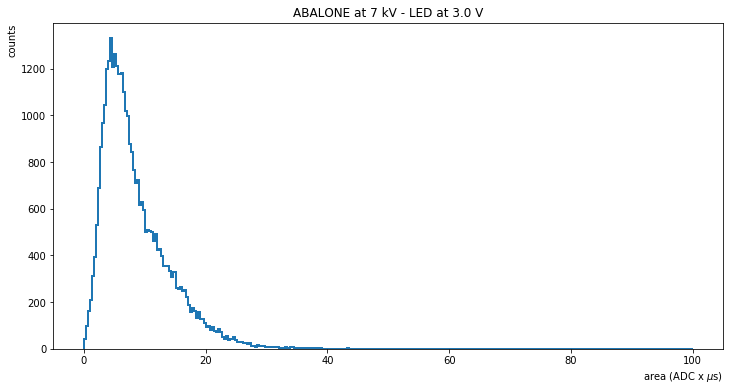

In [7]:
pau.plot_pe_spectrum(new_data['area'], volts=avolt, low=0, high=100, bins=300, ledv=3)

In [ ]:
peakint = pau.calculate_integrals( new_wf, nn=0, volts=avolt, sipmv = 32, ledv = '3', plot = 0, save = 1 )

In [ ]:
pau.plot_pe_spectrum(peakint, volts=avolt, low=0, high=100, bins=300, ledv=4)

/data/abalone/ABALONE_RampingUp/2021_08_25_T0917_ABALONE_7kV_SiPM2_32V_LED400V.dat Number of events 595377.0
Total events number: 595377
event n. 0 time to process: 0.00
event n. 100000 time to process: 12.41
event n. 200000 time to process: 24.78
event n. 300000 time to process: 37.17
event n. 400000 time to process: 49.61
event n. 500000 time to process: 61.98


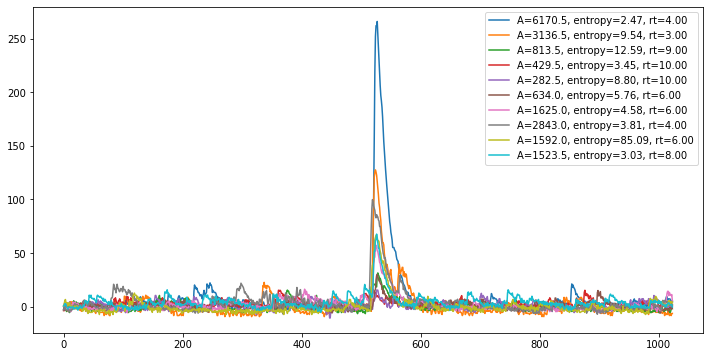

In [8]:
file_LED = '/data/abalone/ABALONE_RampingUp/2021_08_25_T0917_ABALONE_7kV_SiPM2_32V_LED400V.dat'
dataLED = pau.process_abalone_data(filename=file_LED,nn=0,nplot=10,volts=avolt,sipmv=32,ledv='4')

/data/abalone/ABALONE_RampingUp/2021_08_25_T0917_ABALONE_7kV_SiPM2_32V_LED400V.dat Number of events 595377.0
n. events 0 waveform samples 1024
Events rejected by areaup 0 -> 0.0 %

n. events 28249 waveform samples 1024
Events rejected by areadown 28249 -> 4.744724771027433 %

n. events 0 waveform samples 1024
Events rejected by entropy 0 -> 0.0 %

n. events 0 waveform samples 1024
Events rejected by max 0 -> 0.0 %

n. events 23 waveform samples 1024
Events rejected by risetime 23 -> 0.0038630985073323286 %

n. events 162468 waveform samples 1024
Events rejected by max position 162468 -> 27.288256012576905 %

n. events 332540 waveform samples 1024
Events selected  332540 -> 55.85368598383881 %


<Figure size 864x432 with 0 Axes>

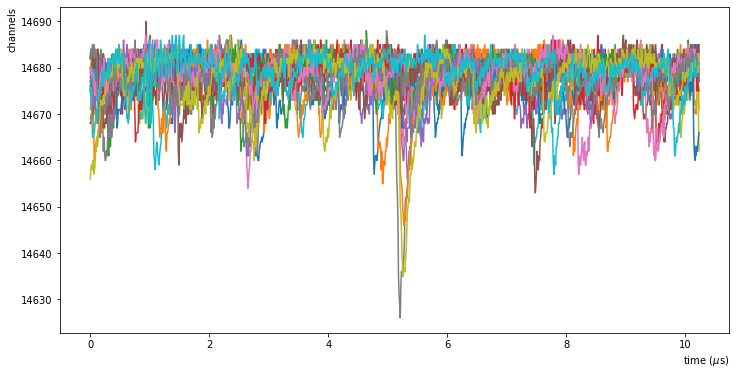

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

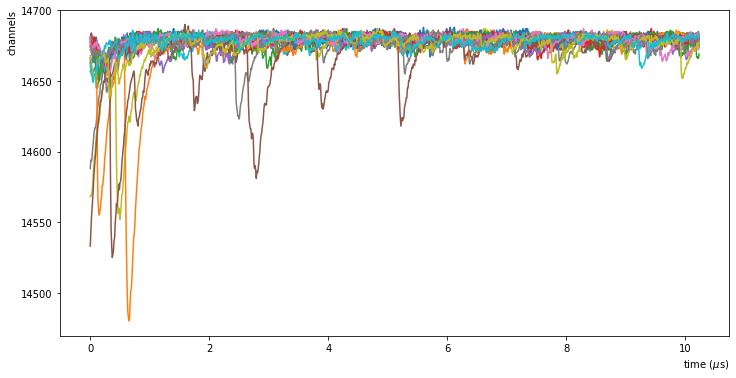

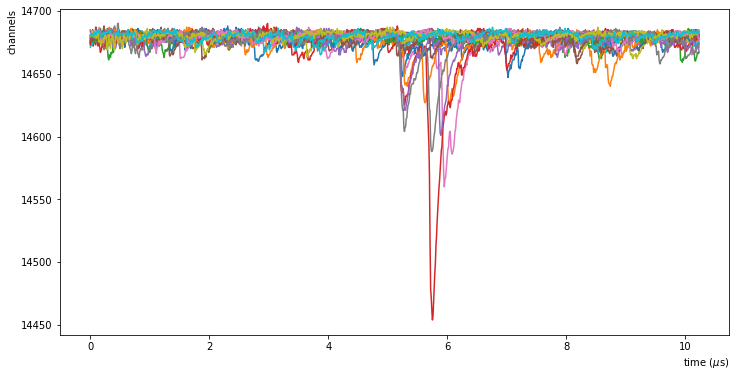

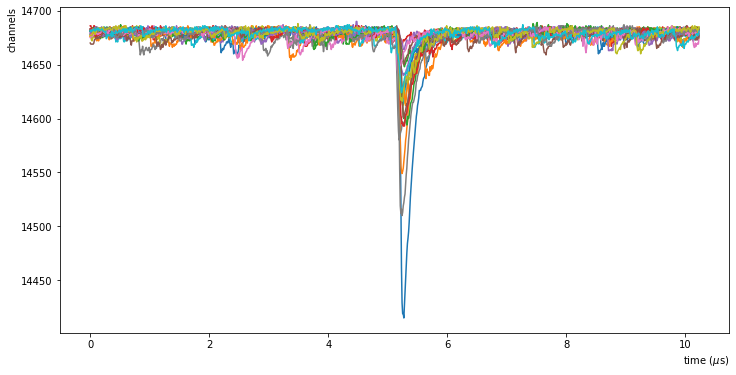

In [10]:
new_data, new_wf = pau.select_data(dataLED,filename=file_LED,entr_cut=200,max_cut=1,area_cut=(0,1e7),
                                   pos_cut=(500,550),rt_cut=0,events=20, save=1,volts=avolt,sipmv=32,ledv='4')

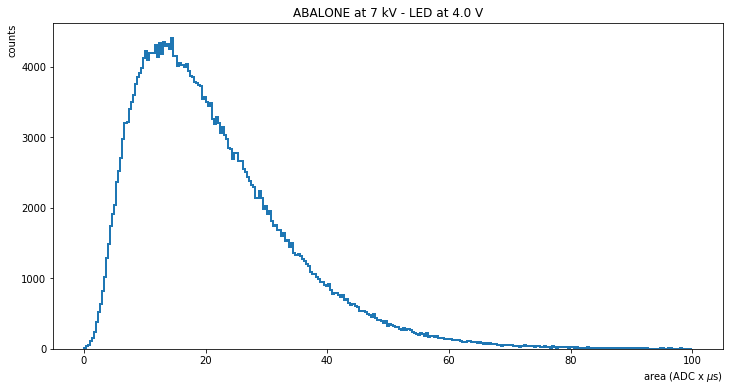

In [11]:
pau.plot_pe_spectrum(new_data['area'], volts=avolt, low=0, high=100, bins=300, ledv=4)